In [1]:
# Import statements

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm

In [2]:
df = pd.read_csv("MLS_clean_data.csv")

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unnamed: 0,MLS No,How Sold,Zip,City,Address,Input Date,List Date,Pending Date,Closing Date,...,Picture_cat,adjectives_public,public_adj_num,word_count_public,adjectives_private,private_adj_num,Private Remarks,word_count_private,month_sold,BR_squared
0,0,40657326,Cash,94621,oakland,1030 76th ave,2014-05-13 12:25:00,2014-05-13 00:00:00,2014-06-12 00:00:00,2014-07-22 00:00:00,...,Up to 10,"['handy-people', 'single', 'habitable']",3,10,"['probate', 'sewer', 'lateral', 'required', 'l...",8,"['ind', 'probate', 'sale', 'pls', 'use', 'prob...",29,7,1.0
1,1,40658443,Cash,94603,oakland,472 hale ave,2014-05-21 09:16:00,2014-05-21 00:00:00,2014-08-09 00:00:00,2014-08-18 00:00:00,...,Up to 10,"['good', 'great']",2,13,['special'],1,"['contractor', 'special', 'cash', 'only', 'wil...",9,8,1.0
2,2,40645598,Cash,94603,oakland,10806 apricot st,2014-02-10 21:27:00,2014-01-26 00:00:00,2014-04-13 00:00:00,2014-04-23 00:00:00,...,Up to 10,"['great', 'great', 'large', 'pre-opened']",4,23,"['*', 'sure', 'east', 'l-san', '*', 'immediate']",6,"['vacant', 'leave', 'mssg', 'for', 'agent', 's...",33,4,1.0
3,3,40640583,Cash,94621,oakland,1116 71st ave,2013-12-12 11:22:00,2013-12-12 00:00:00,2014-05-09 00:00:00,2014-06-11 00:00:00,...,11 to 20,"['special', 'nice', 'upcoming', 'huge', 'public']",5,23,"['special', 'regular', 'please', 'listing', '4...",6,"['contractors', 'special', 'regular', 'sale', ...",25,6,4.0
4,4,40647858,Cash,94621,oakland,5635 holway st,2014-03-03 11:53:00,2014-03-03 00:00:00,2014-03-12 00:00:00,2014-03-12 00:00:00,...,Up to 10,"['short', 'east', 'much', 'great', 'laundry', ...",7,27,[],0,"['drive', 'by', 'till', 'lockbox', 'installed'...",18,3,1.0


In [3]:
df.drop(['Unnamed: 0'],axis =1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115740 entries, 0 to 115739
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MLS No                     115740 non-null  object 
 1   How Sold                   115740 non-null  object 
 2   Zip                        115740 non-null  object 
 3   City                       115740 non-null  object 
 4   Address                    115740 non-null  object 
 5   Input Date                 115740 non-null  object 
 6   List Date                  115740 non-null  object 
 7   Pending Date               115740 non-null  object 
 8   Closing Date               115740 non-null  object 
 9   List Price                 115740 non-null  float64
 10  Sold Price                 115740 non-null  float64
 11  BR                         115740 non-null  float64
 12  Bth                        115740 non-null  float64
 13  SqFt                       11

In [6]:
df.shape

(115740, 35)

In [5]:
#Converting date variable to datetime var
date_vars = ['Input Date', 'List Date', 'Pending Date', 'Closing Date']

for var in date_vars:
    df[var] = pd.to_datetime(df[var], yearfirst=True)

In [6]:
#Converting variables to categorical data
df['How Sold'] = df['How Sold'].astype('category')
df['year_sold'] = df['year_sold'].astype('category')
df['month_sold'] = df['month_sold'].astype('category')
df['Picture_cat'] = df['Picture_cat'].astype('category')


In [7]:
df.rename(columns={'How Sold': 'How_Sold', 'Lot SqFt': 'Lot_SqFt', 'Garage (Y/N)':'Garage', 'Media Link': 'Media_Link', 'Picture Count':'Picture_Count'}, inplace=True)


In [8]:
df.columns

Index(['MLS No', 'How_Sold', 'Zip', 'City', 'Address', 'Input Date',
       'List Date', 'Pending Date', 'Closing Date', 'List Price', 'Sold Price',
       'BR', 'Bth', 'SqFt', 'Lot_SqFt', 'Garage', 'Age', 'Picture_Count',
       'Confidential Remarks 1000', 'Public Remarks', 'Media_Link',
       'days_on_market', 'days_on_MLS', 'year_sold', 'Sold', 'Picture_cat',
       'adjectives_public', 'public_adj_num', 'word_count_public',
       'adjectives_private', 'private_adj_num', 'Private Remarks',
       'word_count_private', 'month_sold', 'BR_squared'],
      dtype='object')

In [9]:
#Defining X variable for regression


x_vars = ['BR', 'BR_squared', 'Bth', 'SqFt', 'Lot_SqFt', 'Garage', 'Age', 'How_Sold', 'year_sold', 'month_sold', 'Media_Link', 'Picture_Count'
         , 'word_count_public', 'word_count_private', 'private_adj_num', 'public_adj_num']

In [10]:
X = df[x_vars]

In [11]:
X.shape

(115740, 16)

In [12]:
X = pd.get_dummies(X, drop_first=True)

In [13]:
X.columns

Index(['BR', 'BR_squared', 'Bth', 'SqFt', 'Lot_SqFt', 'Garage', 'Age',
       'Media_Link', 'Picture_Count', 'word_count_public',
       'word_count_private', 'private_adj_num', 'public_adj_num',
       'How_Sold_Conventional', 'How_Sold_Government', 'How_Sold_Other',
       'year_sold_2011', 'year_sold_2012', 'year_sold_2013', 'year_sold_2014',
       'year_sold_2015', 'year_sold_2016', 'year_sold_2017', 'year_sold_2018',
       'year_sold_2019', 'year_sold_2020', 'year_sold_2021', 'month_sold_2',
       'month_sold_3', 'month_sold_4', 'month_sold_5', 'month_sold_6',
       'month_sold_7', 'month_sold_8', 'month_sold_9', 'month_sold_10',
       'month_sold_11', 'month_sold_12'],
      dtype='object')

In [14]:
X.shape

(115740, 38)

In [15]:
y1 = df['Sold Price']

In [16]:
y2 = df['days_on_market']

In [51]:
import statsmodels.api as sm

#Training a baseline model with sold price as dependent variable

X = sm.add_constant(X)
model = sm.OLS(y1, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sold Price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     7229.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:35:44   Log-Likelihood:            -1.6143e+06
No. Observations:              115740   AIC:                         3.229e+06
Df Residuals:                  115701   BIC:                         3.229e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.392e+

<AxesSubplot:>

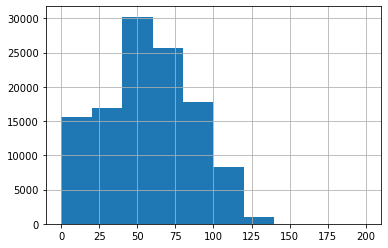

In [20]:
df['Age'].hist()

<AxesSubplot:xlabel='Age', ylabel='Sold Price'>

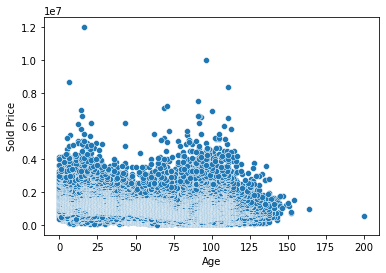

In [21]:
sns.scatterplot(x='Age', y='Sold Price', data=df)

<AxesSubplot:>

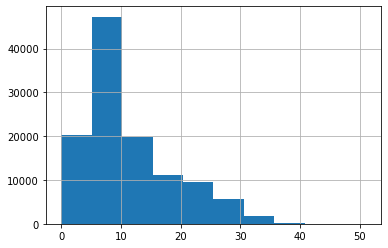

In [22]:
df['public_adj_num'].hist()

In [23]:
df['adjectives_public'].head()

0              ['handy-people', 'single', 'habitable']
1                                    ['good', 'great']
2            ['great', 'great', 'large', 'pre-opened']
3    ['special', 'nice', 'upcoming', 'huge', 'public']
4    ['short', 'east', 'much', 'great', 'laundry', ...
Name: adjectives_public, dtype: object

In [24]:
##Data preping for word cloud
all_public_adj = ' '.join(df['adjectives_public']).split()

In [25]:
import re 
text =  re.sub("[^-9A-Za-z ]", "" , str(all_public_adj))

In [26]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

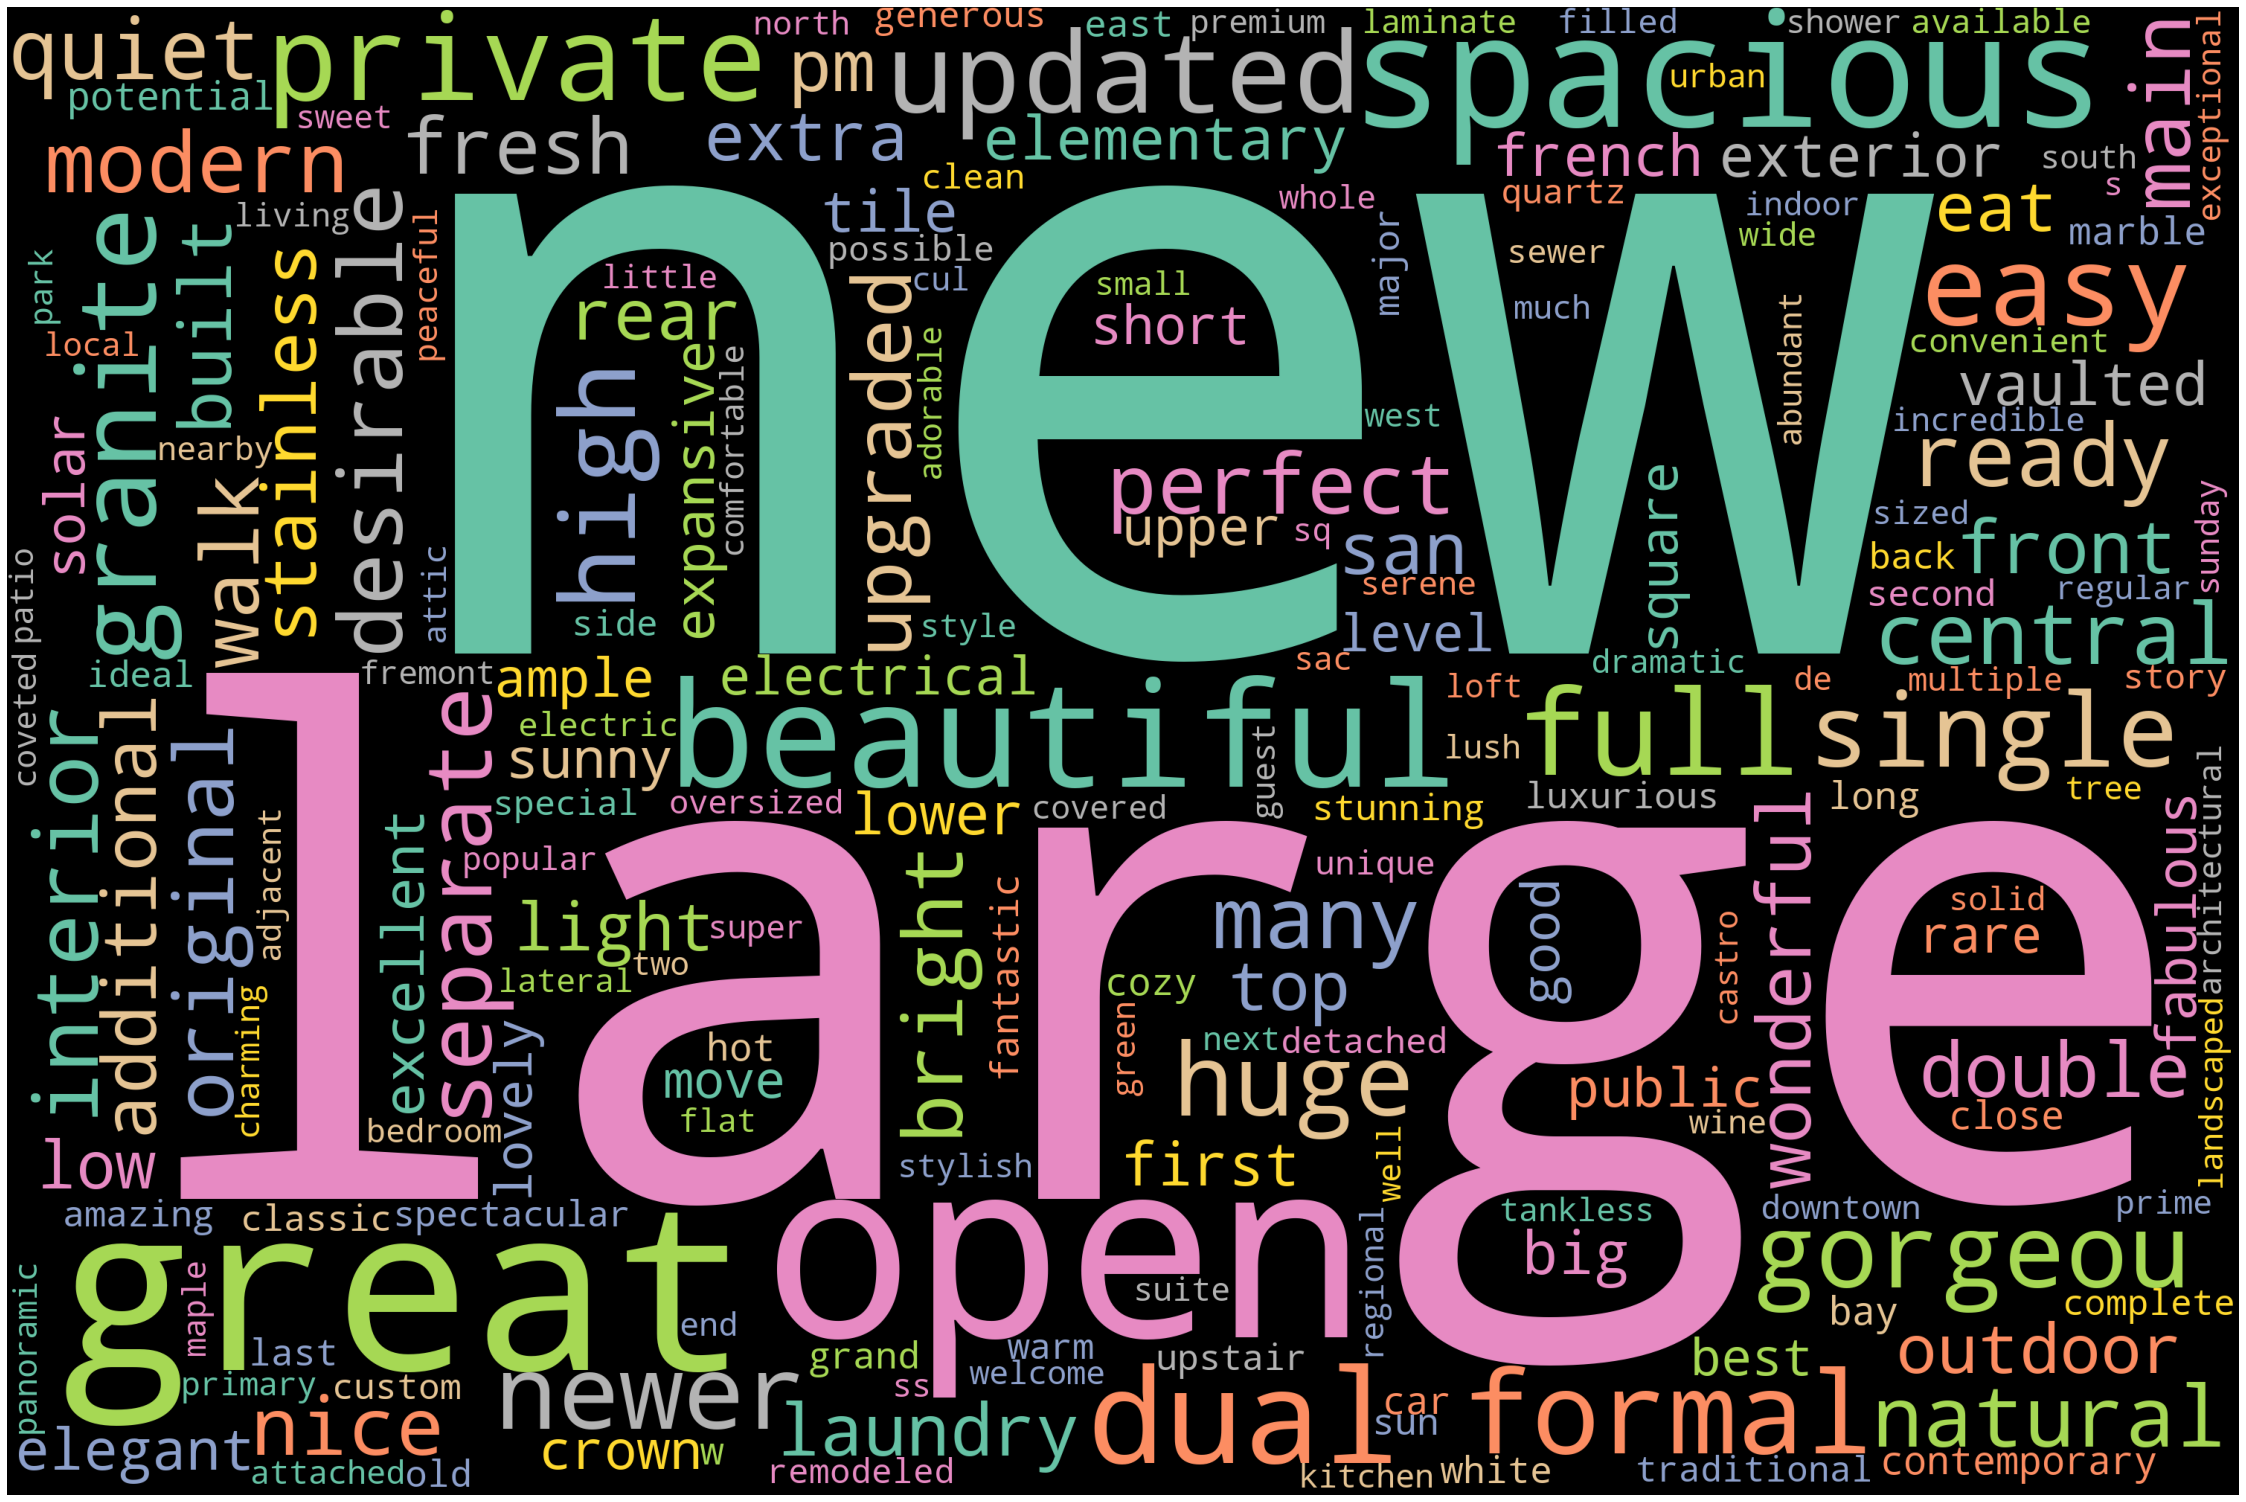

In [27]:
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
plot_cloud(wordcloud)

In [52]:
#Training a model with market days as dependent variable

model2 = sm.OLS(y2, X)
results = model2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         days_on_market   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     293.3
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:35:55   Log-Likelihood:            -5.6884e+05
No. Observations:              115740   AIC:                         1.138e+06
Df Residuals:                  115701   BIC:                         1.138e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    57.36

In [ ]:
#After compiling the two baseline models, optimizing by comparing other types of regressions


In [22]:
#Import statements
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [19]:
#Splitting the data for Sold Price regression
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [55]:
lr = LinearRegression()
lr.fit(X_train, y1_train)

pred_train_lr= lr.predict(X_train)
print('RMSE of linear regression on train set: {:.2f}'.format((np.sqrt(mean_squared_error(y1_train,pred_train_lr)))))
print('R-squared of linear regression on train set: {:.2f}'.format((r2_score(y1_train, pred_train_lr))))

pred_test_lr= lr.predict(X_test)
print('RMSE of linear regression on test set: {:.2f}'.format(np.sqrt(mean_squared_error(y1_test,pred_test_lr))))
print('R-squared of linear regression on test set: {:.2f}'.format((r2_score(y1_test, pred_test_lr))))

RMSE of linear regression on train set: 275626.52
R-squared of linear regression on train set: 0.70
RMSE of linear regression on test set: 277920.51
R-squared of linear regression on test set: 0.70


In [56]:
#Ridge regression
rr = Ridge(alpha=0.01)
rr.fit(X_train, y1_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_rr)))
print(r2_score(y1_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y1_test,pred_test_rr))) 
print(r2_score(y1_test, pred_test_rr))

275626.52154600574
0.7037333375753978
277920.51273617795
0.7030665854300859


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.23965e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [57]:
#Adjusting alpha 
rr = Ridge(alpha=100)
rr.fit(X_train, y1_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_rr)))
print(r2_score(y1_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y1_test,pred_test_rr))) 
print(r2_score(y1_test, pred_test_rr))

275832.1639009734
0.7032910891183727
278114.8910334383
0.7026510882448951


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.23965e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [58]:
# Lasso Regression
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y1_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_lasso)))
print(r2_score(y1_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y1_test,pred_test_lasso))) 
print(r2_score(y1_test, pred_test_lasso))

275626.52154346614
0.7037333375808574
277920.5162218896
0.7030665779817387


In [59]:
#Adjusting alpha
model_lasso = Lasso(alpha=100)
model_lasso.fit(X_train, y1_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_lasso)))
print(r2_score(y1_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y1_test,pred_test_lasso))) 
print(r2_score(y1_test, pred_test_lasso))

275671.13236511865
0.7036374268626712
277977.8728010921
0.7029440044993128


In [60]:
#Trying Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y1_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_enet)))
print(r2_score(y1_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y1_test,pred_test_enet)))
print(r2_score(y1_test, pred_test_enet))

277278.4433592262
0.7001714455170414
279481.1000146716
0.6997225247370571


In [61]:
#KNN Regressor
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y1_train) 
pred_train_knn= model_knn.predict(X_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_knn)))
print(r2_score(y1_train, pred_train_knn))

pred_test_knn= model_knn.predict(X_test)
print(np.sqrt(mean_squared_error(y1_test,pred_test_knn)))
print(r2_score(y1_test, pred_test_knn))

272779.9351378852
0.7098212403378602
341396.3412811848
0.5519406001873597


In [62]:
#Decision tree regressor

DTR = DecisionTreeRegressor(max_depth=5)
DTR.fit(X_train, y1_train) 
pred_train_DTR= DTR.predict(X_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_DTR)))
print(r2_score(y1_train, pred_train_DTR))

pred_test_DTR= DTR.predict(X_test)
print(np.sqrt(mean_squared_error(y1_test,pred_test_DTR)))
print(r2_score(y1_test, pred_test_DTR))

302074.34495597833
0.64414877822804
309542.5088039539
0.6316518744669078


In [42]:
#Random Forest Regressor

RFR = RandomForestRegressor(n_estimators = 20, max_depth=10, random_state=42)
RFR.fit(X_train, y1_train) 
pred_train_RFR= RFR.predict(X_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_RFR)))
print(r2_score(y1_train, pred_train_RFR))

pred_test_RFR= RFR.predict(X_test)
print(np.sqrt(mean_squared_error(y1_test,pred_test_RFR)))
print(r2_score(y1_test, pred_test_RFR))

236952.22900385264
0.7810412155738403
268875.66369516286
0.7220793232599944


In [64]:
#Huber Regression
from sklearn.linear_model import HuberRegressor
HBR = HuberRegressor()
HBR.fit(X_train, y1_train) 
pred_train_HBR= HBR.predict(X_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_HBR)))
print(r2_score(y1_train, pred_train_HBR))

pred_test_HBR= HBR.predict(X_test)
print(np.sqrt(mean_squared_error(y1_test,pred_test_HBR)))
print(r2_score(y1_test, pred_test_HBR))

372378.3959739916
0.4592335615129933
370126.93813850713
0.4733534337854627


In [69]:
#Gradient Boosting Regressor
from sklearn.ensemble  import GradientBoostingRegressor

GBR = GradientBoostingRegressor(n_estimators=10)

GBR.fit(X_train, y1_train) 
pred_train_GBR = GBR.predict(X_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_GBR)))
print(r2_score(y1_train, pred_train_GBR))

pred_test_GBR= GBR.predict(X_test)
print(np.sqrt(mean_squared_error(y1_test,pred_test_GBR)))
print(r2_score(y1_test, pred_test_GBR))

347810.71189855115
0.5282339512872686
354260.7629890417
0.5175370420905103


In [ ]:
# The model with highest R^2 and lowest RMSE is the Random Forest Regressor

In [43]:
#Random Forest Regressor Feature Importance
pd.DataFrame({'Variable':X.columns,
              'Importance':RFR.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
3,SqFt,0.611284
9,word_count_public,0.172363
26,year_sold_2021,0.048205
8,Picture_Count,0.041420
6,Age,0.040058
4,Lot_SqFt,0.019205
14,How_Sold_Government,0.008455
17,year_sold_2012,0.007871
12,public_adj_num,0.007350
10,word_count_private,0.005152


In [51]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 50]
}
# Create a based model
RFR = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFR, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [52]:
grid_search.fit(X_train, y1_train)
grid_search.best_params_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 50}

In [66]:
#Estimating best model based on Grid Search CV. Model significantly improves - R^2 is 0.82 and RMSE is lowest 
RFR = RandomForestRegressor(bootstrap = True, n_estimators = 50, max_depth=30, random_state=42, max_features=3, min_samples_leaf=3, min_samples_split = 8)
RFR.fit(X_train, y1_train) 
pred_train_RFR= RFR.predict(X_train)
print('RMSE of Random Forest Regressor on train set: {:.2f}'.format(np.sqrt(mean_squared_error(y1_train,pred_train_RFR))))
print('R-squared of Random Forest regressor on train set: {:.2f}'.format(r2_score(y1_train, pred_train_RFR)))

pred_test_RFR= RFR.predict(X_test)
print('RMSE of Random Forest regressor on test set: {:.2f}'.format((np.sqrt(mean_squared_error(y1_test,pred_test_RFR)))))
print('R-squared of Random Forest regressor on test set: {:.2f}'.format(r2_score(y1_test, pred_test_RFR)))



RMSE of Random Forest Regressor on train set: 215906.47
R-squared of Random Forest regressor on train set: 0.82
RMSE of Random Forest regressor on test set: 274623.27
R-squared of Random Forest regressor on test set: 0.71


In [67]:
#Random Forest Regressor Feature Importance
pd.DataFrame({'Variable':X.columns,
              'Importance':RFR.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
3,SqFt,0.217699
2,Bth,0.113149
8,Picture_Count,0.087890
4,Lot_SqFt,0.074253
9,word_count_public,0.070198
12,public_adj_num,0.062552
0,BR,0.061483
6,Age,0.050221
26,year_sold_2021,0.047762
1,BR_squared,0.047658
